## Integração entre pint e numpy

No [último artigo do site](https://cienciaprogramada.com.br/2020/09/python-unidades-cerveja-pint/), mostrei a incrível  biblioteca `pint` para lidar com unidades e mostrei uma forma de resolver computacionalmente o problema de conversão que deixou um avião sem combustível em pleno voo conforme descrito nesse outro artigo.

Hoje, continuaremos a falar de unidades com a biblioteca `pint`, mostrando como ela se integra com a biblioteca `numpy` e com gráficos feitos com o `matplotlib`.

Primeiro, vamos importar os pacotes necessários:

In [1]:
import pint
import numpy as np
import matplotlib.pyplot as plt

Criar o registro de unidades e o construtor de quantidades do `pint`:

In [2]:
ureg = pint.UnitRegistry()
Q_ = ureg.Quantity

### Vamos descrever um movimento

Para exemplificar, resolvi pegar um exemplo de uma questão de ensino médio de física. Peguei o livro que usei no ensino médio e achei um exercício sobre gráficos de movimentos uniformemente variados (MUV).

![foto_livro](images/foto_livro.png)

O livro é "Fundamentos de Física - Volume 1: Mecânica" de Francisco Ramalho Júnior e outros, Ed. Moderna, 1976.

Calma, se não lembra o que é MUV, segue um resumão (*leia ao som de [Telecurso 2000](https://www.youtube.com/watch?v=YE-pEwpuQfI)*):

- Os movimentos são classificados em duas amplas categorias: *movimentos uniformes*, que possuem velocidade constante, e *movimentos variados*, aqueles cuja velocidade varia no tempo.
- No *movimento uniforme*, a velocidade média calculada em qualquer intervalo de tempo é sempre a mesma, o que não ocorre no *movimento variado*.
- O *movimento uniformemente variado (MUV)* é um movimento no qual a velocidade varia uniformemente com o tempo. A aceleração é medida pela variação da velocidade no tempo.
- No MUV a aceleração é constante no decurso do tempo.
- Um MUV possui aceleração escalar constante com o tempo e velocidade variável de acordo com a função
$$
v = v_0 + \alpha t
$$
onde $v_0$ é a velocidade inicial, $\alpha$ é a aceleração e $t$ é tempo.
- Para que a descrição do movimento seja completa, devemos conhecer como a posição $x$ varia no tempo:

$$ x(t) = x_0 + v_0 t + \frac{1}{2} \alpha t $$

Agora que revisamos, vamos definir o que desejamos:

- queremos construir um gráfico de posição em função do tempo, ou seja, $x(t)$;
- logo, precisamos de pontos para esse gráfico no formato (tempo, posição);
- os pontos consideram que a posição está em metro e o tempo em segundo;
- para ter um gráfico minimamente aceitável, precisamos de alguns pontos. Como estamos usando um computador e temos uma biblioteca como o `numpy` disponível para fazer contas rapidamente, iremos considerar um mínimo aceitável de 50 pontos, o usuário podendo selecionar mais ou menos pontos se desejar;
- usaremos o fato de que podemos definir a posição em qualquer tempo $t$ em um MUV sabendo apenas a posição inicial, a velocidade inicial e a aceleração;
- sabemos que uma função Python pode retornar mais de um valor e, quando assim o faz, retorna os valores na forma de uma tupla;
- usaremos os dados do exercício do livro como teste para a função a ser definida;
- por padrão, a função considera o tempo inicial como sendo zero, ficando a cargo do usuário passar o tempo final.

Vamos dividir o problema em duas partes:

1. Obtenção dos pontos (tempo, posição)
2. Plot do gráfico

Podemos então esboçar nossa função desejada, que chamaremos de `movimento_uniformemente_variado` como:

```python
# ESBOÇO
def movimento_uniformemente_variado(posicao_inicial, velocidade_inicial, aceleracao, tempo_final, tempo_inicial=0, pontos=50):
    # definição do array de valores de tempo com numpy linspace
    # cálculo da posição em cada tempo, gerando um array de valores de posição
    # associar unidades aos valores
    return tempo, posicao
```

O método `linspace` do `numpy` é excelente para obter valores espaçados igualmente, no caso valores de tempo, gerando um array (vetor). Basta, então, pegar tal array e calcular a posição em cada tempo. Usando o `wraps` do `pint`, explicado no [último artigo](https://cienciaprogramada.com.br/2020/09/python-unidades-cerveja-pint/#Aplicando_em_um_caso_real), podemos definir cada unidade desejada. Implementando então a função:

In [3]:
ureg.wraps(('second', 'meter'), ('meter', 'm/s', 'm/(s**2)', 'second', 'second', None))
def movimento_uniformemente_variado(posicao_inicial, velocidade_inicial, aceleracao, tempo_final, tempo_inicial=0, pontos=50):
    '''
    Retorna pares (tempo, posicao) para uma equação que descreve a posição em um movimento uniformemente variado
    
    Parâmetros:
    -----------
    posicao_inicial: pint.Quantity, se espera quantidade em metros
    velocidade_inicial: pint.Quantity, se espera quantidade em metros por segundo
    aceleracao: pint.Quantity, se espera quantidade em metros por segundos ao quadrado
    tempo_final: pint.Quantity, se espera quantidade em segundos
    tempo_inicial: pint.Quantity, se espera quantidade em segundos, padrão de 0
    pontos: integer, quantidade de pontos a serem calculados, padrão de 50
    
    Retorna:
    --------
    tupla, 2 arrays relativos a (tempo, posição) com unidades via pint
    '''
    tempo = np.linspace(0, tempo_final, pontos)
    posicao = posicao_inicial - velocidade_inicial * tempo + 1/2 * aceleracao * tempo**2
    return tempo, posicao

Vamos então criar as variáveis que serão passadas como parâmetros da função com os valores do exercício:

In [4]:
pos_inicial = Q_('12 m')
vel_inicial = Q_('8 m/s')
acel = Q_('2 m/(s**2)')
t_final = Q_('8 s')

In [5]:
muv = movimento_uniformemente_variado(pos_inicial, vel_inicial, acel, t_final)

Vamos verificar como é a variável `muv`:

In [6]:
muv

(array([0.        , 0.16326531, 0.32653061, 0.48979592, 0.65306122,
        0.81632653, 0.97959184, 1.14285714, 1.30612245, 1.46938776,
        1.63265306, 1.79591837, 1.95918367, 2.12244898, 2.28571429,
        2.44897959, 2.6122449 , 2.7755102 , 2.93877551, 3.10204082,
        3.26530612, 3.42857143, 3.59183673, 3.75510204, 3.91836735,
        4.08163265, 4.24489796, 4.40816327, 4.57142857, 4.73469388,
        4.89795918, 5.06122449, 5.2244898 , 5.3877551 , 5.55102041,
        5.71428571, 5.87755102, 6.04081633, 6.20408163, 6.36734694,
        6.53061224, 6.69387755, 6.85714286, 7.02040816, 7.18367347,
        7.34693878, 7.51020408, 7.67346939, 7.83673469, 8.        ]) <Unit('second')>,
 array([12.        , 10.72053311,  9.49437734,  8.32153269,  7.20199917,
         6.13577676,  5.12286547,  4.16326531,  3.25697626,  2.40399833,
         1.60433153,  0.85797584,  0.16493128, -0.47480217, -1.06122449,
        -1.59433569, -2.07413578, -2.50062474, -2.87380258, -3.1936693 ,
        -

Repare que se trata de um tupla de dois arrays, um para tempo e outro para posição, e que tais arrays estão com unidades associadas, conforme desejado pelo uso do pacote `pint`.

## Integração entre pint e matplotlib

Para plotar, não é necessária criar uma função. Basta passar para o método `plot` do `matplotlib.pyplot` os valores dos eixos horizontal e vertical:

/home/chicolucio/Dropbox/work/cienciaprogramada/code/pint/.venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


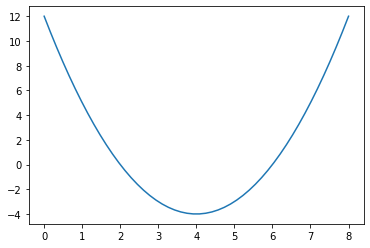

In [7]:
plt.plot(muv[0], muv[1])

Observe que foi exibido um *warning*, informando que as unidades foram retiradas. Isso ocorre pois não configuramos o registro de unidades para funcionar com o `matplotlib`. Para configurar basta o seguindo comando:

In [8]:
ureg.setup_matplotlib(True)

Solicitando novamente o plot:

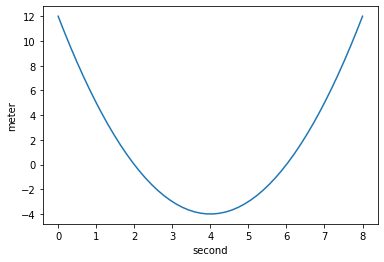

In [9]:
plt.plot(muv[0], muv[1])

Tiramos o warning. Mas ainda há muito o que melhorar.

## Melhorando a legibilidade do código

Tento, dentro das minhas limitações de conhecimento da linguagem obviamente, sempre seguir o Zen do Python:

In [10]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


Especialmente o *Readability counts* (legibilidade conta). Por isso, defini a função com parâmetros que possuem nomes que efetivamente significam algo (e não aquela loucura de *x, v, t* e afins, isso serve em papel, não em código). E efetivamente me incomoda ter que chamar tuplas por índices. Seria melhor poder fazer algo como `muv.tempo` e `muv.posicao`. E na realidade isso é possível...

Para isso servem as tuplas nomeadas `namedtuple`:

In [11]:
from collections import namedtuple

Adaptando levemente a função definida previamente:

In [12]:
ureg.wraps(('second', 'meter'), ('meter', 'm/s', 'm/(s**2)', 'second', 'second', None))
def movimento_uniformemente_variado(posicao_inicial, velocidade_inicial, aceleracao, tempo_final, tempo_inicial=0, pontos=50):
    '''
    Retorna pares (tempo, posicao) para uma equação que descreve a posição em um movimento uniformemente variado
    
    Parâmetros:
    -----------
    posicao_inicial: pint.Quantity, se espera quantidade em metros
    velocidade_inicial: pint.Quantity, se espera quantidade em metros por segundo
    aceleracao: pint.Quantity, se espera quantidade em metros por segundos ao quadrado
    tempo_final: pint.Quantity, se espera quantidade em segundos
    tempo_inicial: pint.Quantity, se espera quantidade em segundos, padrão de 0
    pontos: integer, quantidade de pontos a serem calculados, padrão de 50
    
    Retorna:
    --------
    tupla nomeada, 2 arrays relativos a (tempo, posição) com unidades via pint
    '''
    tempo = np.linspace(0, tempo_final, pontos)
    posicao = posicao_inicial - velocidade_inicial * tempo + 1/2 * aceleracao * tempo**2
    Dados = namedtuple('MUV', ['tempo', 'posicao'])    
    return Dados(tempo, posicao)

In [13]:
muv = movimento_uniformemente_variado(pos_inicial, vel_inicial, acel, t_final)

In [14]:
muv

MUV(tempo=<Quantity([0.         0.16326531 0.32653061 0.48979592 0.65306122 0.81632653
 0.97959184 1.14285714 1.30612245 1.46938776 1.63265306 1.79591837
 1.95918367 2.12244898 2.28571429 2.44897959 2.6122449  2.7755102
 2.93877551 3.10204082 3.26530612 3.42857143 3.59183673 3.75510204
 3.91836735 4.08163265 4.24489796 4.40816327 4.57142857 4.73469388
 4.89795918 5.06122449 5.2244898  5.3877551  5.55102041 5.71428571
 5.87755102 6.04081633 6.20408163 6.36734694 6.53061224 6.69387755
 6.85714286 7.02040816 7.18367347 7.34693878 7.51020408 7.67346939
 7.83673469 8.        ], 'second')>, posicao=<Quantity([12.         10.72053311  9.49437734  8.32153269  7.20199917  6.13577676
  5.12286547  4.16326531  3.25697626  2.40399833  1.60433153  0.85797584
  0.16493128 -0.47480217 -1.06122449 -1.59433569 -2.07413578 -2.50062474
 -2.87380258 -3.1936693  -3.46022491 -3.67346939 -3.83340275 -3.94002499
 -3.99333611 -3.99333611 -3.94002499 -3.83340275 -3.67346939 -3.46022491
 -3.1936693  -2.87380258 

Agora podemos chamar pelos nomes:

In [15]:
muv.tempo

Magnitude,[0.0 0.16326530612244897 0.32653061224489793 0.4897959183673469 0.6530612244897959 0.8163265306122448 0.9795918367346939 1.1428571428571428 1.3061224489795917 1.4693877551020407 1.6326530612244896 1.7959183673469385 1.9591836734693877 2.1224489795918364 2.2857142857142856 2.4489795918367343 2.6122448979591835 2.7755102040816326 2.9387755102040813 3.1020408163265305 3.265306122448979 3.4285714285714284 3.591836734693877 3.7551020408163263 3.9183673469387754 4.081632653061225 4.244897959183673 4.408163265306122 4.571428571428571 4.73469387755102 4.897959183673469 5.061224489795918 5.224489795918367 5.387755102040816 5.551020408163265 5.7142857142857135 5.877551020408163 6.040816326530612 6.204081632653061 6.367346938775509 6.530612244897958 6.693877551020408 6.857142857142857 7.020408163265306 7.183673469387754 7.346938775510203 7.5102040816326525 7.673469387755102 7.836734693877551 8.0]
Units,second


In [16]:
muv.posicao

Magnitude,[12.0 10.720533111203665 9.494377342773845 8.321532694710536 7.201999167013745 6.135776759683466 5.122865472719701 4.163265306122449 3.2569762598917125 2.4039983340274893 1.6043315285297801 0.8579758433985849 0.16493127863390278 -0.47480216576426404 -1.0612244897959178 -1.5943356934610566 -2.0741357767596833 -2.500624739691795 -2.873802582257392 -3.193669304456476 -3.4602249062890458 -3.6734693877551017 -3.8334027488546436 -3.9400249895876716 -3.9933361099541855 -3.9933361099541855 -3.9400249895876733 -3.8334027488546454 -3.6734693877551017 -3.4602249062890458 -3.1936693044564777 -2.873802582257394 -2.5006247396917978 -2.0741357767596824 -1.5943356934610584 -1.0612244897959187 -0.4748021657642667 0.164931278633901 0.8579758433985845 1.6043315285297766 2.4039983340274844 3.256976259891708 4.163265306122447 5.122865472719695 6.135776759683459 7.201999167013739 8.321532694710534 9.494377342773845 10.720533111203665 12.0]
Units,meter


Mas o interessante é que a lógica de chamar por índices ainda funciona:

In [17]:
muv[0]

Magnitude,[0.0 0.16326530612244897 0.32653061224489793 0.4897959183673469 0.6530612244897959 0.8163265306122448 0.9795918367346939 1.1428571428571428 1.3061224489795917 1.4693877551020407 1.6326530612244896 1.7959183673469385 1.9591836734693877 2.1224489795918364 2.2857142857142856 2.4489795918367343 2.6122448979591835 2.7755102040816326 2.9387755102040813 3.1020408163265305 3.265306122448979 3.4285714285714284 3.591836734693877 3.7551020408163263 3.9183673469387754 4.081632653061225 4.244897959183673 4.408163265306122 4.571428571428571 4.73469387755102 4.897959183673469 5.061224489795918 5.224489795918367 5.387755102040816 5.551020408163265 5.7142857142857135 5.877551020408163 6.040816326530612 6.204081632653061 6.367346938775509 6.530612244897958 6.693877551020408 6.857142857142857 7.020408163265306 7.183673469387754 7.346938775510203 7.5102040816326525 7.673469387755102 7.836734693877551 8.0]
Units,second


In [18]:
muv[1]

Magnitude,[12.0 10.720533111203665 9.494377342773845 8.321532694710536 7.201999167013745 6.135776759683466 5.122865472719701 4.163265306122449 3.2569762598917125 2.4039983340274893 1.6043315285297801 0.8579758433985849 0.16493127863390278 -0.47480216576426404 -1.0612244897959178 -1.5943356934610566 -2.0741357767596833 -2.500624739691795 -2.873802582257392 -3.193669304456476 -3.4602249062890458 -3.6734693877551017 -3.8334027488546436 -3.9400249895876716 -3.9933361099541855 -3.9933361099541855 -3.9400249895876733 -3.8334027488546454 -3.6734693877551017 -3.4602249062890458 -3.1936693044564777 -2.873802582257394 -2.5006247396917978 -2.0741357767596824 -1.5943356934610584 -1.0612244897959187 -0.4748021657642667 0.164931278633901 0.8579758433985845 1.6043315285297766 2.4039983340274844 3.256976259891708 4.163265306122447 5.122865472719695 6.135776759683459 7.201999167013739 8.321532694710534 9.494377342773845 10.720533111203665 12.0]
Units,meter


Mas veja se não fica bem melhor de entender o seguinte comando para o gráfico:

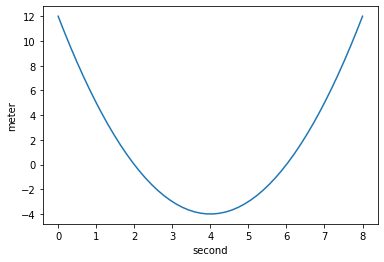

In [19]:
plt.plot(muv.tempo, muv.posicao)

Não sei para você, mas para mim esse código é muito mais expressivo, comunica bem melhor o que está sendo solicitado.

Obviamente que todo o poder do `pint` pode ser utilizado nos gráficos também. Se você quiser um gráfico com tempo em milisegundos e a posição em pés:

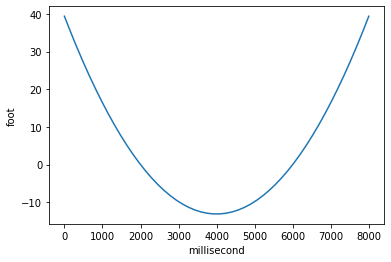

In [20]:
plt.plot(muv.tempo.to('ms'), muv.posicao.to('ft'))

## Explorando mais a integração com o matplotlib

Para os fins desse artigo, o que foi mostrado até aqui já seria o suficiente. Mas vou aproveitar para mostrar algumas coisas um pouco mais avançadas de `matplotlib` e como combiná-las com o `pint`.

O `matplotlib` possui alguns estilos de gráfico pré-definidos que podem ser [vistos aqui](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html). Mas particularmente gosto de fazer meus próprios estilos, pois tenho algumas necessidades mais específicas. Por exemplo, como atuo na área de ensino, gosto que os gráficos apresentem linhas de grid nas divisões primárias e nas secundárias, pois isso facilita a leitura por parte do aluno, seja num material de consulta ou num exercício.

Uma boa forma de ter gráficos padronizados por todo o documento é ter uma função que define os parâmetros de grid, das indicações de escala (*ticks*) e de fonte para um dado eixo e chamar essa função no corpo de cada função de plot que utilizar no documento. Afinal, pode haver mais de uma função de plot, já que podem haver gráficos que não necessitem, por exemplo, de tratamento de unidades ou gráficos de diferentes funções matemáticas (no contexto desse artigo, movimentos uniformes ou variados).

Assim, vamos definir uma função que retorne eixos com as definições que quero. Ainda vou fazer um artigo mais detalhado sobre as terminologias do `matplotlib`, mas caso não saiba a diferença eixo e figura recomendo [esse link da documentação](https://matplotlib.org/examples/showcase/anatomy.html) e esse do [StackOverflow](https://stackoverflow.com/questions/37970424/what-is-the-difference-between-drawing-plots-using-plot-axes-or-figure-in-matpl).

In [21]:
def _plot_params(ax=None):
        """Parâmetros personalizados para gráficos.

        Parâmetros:
        ----------
        ax : Matplotlib axes, opcional, eixos onde o gráfico será plotado, padrão None
            
        Retorno:
        --------
        Matplotlib axes, eixo para uma figura
        """
        
        linewidth = 2
        size = 12

        # grid e ticks
        ax.minorticks_on()
        ax.grid(b=True, which='major', linestyle='--',
                linewidth=linewidth - 0.5)
        ax.grid(b=True, which='minor', axis='both',
                linestyle=':', linewidth=linewidth - 1)
        ax.tick_params(which='both', labelsize=size+2)
        ax.tick_params(which='major', length=6, axis='both')
        ax.tick_params(which='minor', length=3, axis='both')

        # nome dos eixos
        ax.xaxis.label.set_size(size+4)
        ax.yaxis.label.set_size(size+4)

        return

Agora vamos definir uma função para plotar nossos dados do MUV. Uma forma de trabalhar que costumo adotar é de sempre trabalhar com eixos do `matplotlib` pois isso me dá mais flexibilidade se eu quiser, por exemplo, fazer figuras com gráficos lado a lado. Vou ilustrar isso mais adiante, caso não tenha ficado claro. Mas é por esse motivo que na função há um parâmetro `ax`. Esse parâmetro é, por padrão, `None` e, caso realmente não seja passado um eixo para função, uma figura com um eixo será criada (cláusula condicional `if` presente na função):

In [22]:
def plot_muv(array_tempo, array_posicao, unidade_tempo='s', unidade_posicao='m', nome_eixo_y='Position', nome_eixo_x='Time', ax=None, tamanho=(8, 6)):
    '''
    Função para plotar o gráfico de um Movimento Uniformemente Variado
    
    Parâmetros:
    ----------
    array_tempo: pint array, array de valores relacionados a tempo com unidade associada
    array_posicao: pint array, array de valores relacionados a posição com unidade associada
    unidade_tempo: string, unidade para utilizar com os valores de tempo, padrão "segundos"
    unidade_posicao: string, unidade para utilizar com os valores de posicao, padrão "metros"
    nome_eixo_y: string, nome para o eixo vertical, padrão 'Position'
    nome_eixo_x: string, nome para o eixo horizontal, padrão 'Time'
    ax: Matplotlib axes, eixo onde o gráfico será plotado, padrão None
    tamanho: tuple, tamanho da figura que será criada caso nenhum eixo seja passado, padrão (8, 6)
    
    Retorno:
    --------
    Matplotlib axes, eixo para uma figura
    '''
    
    if ax is None:
        fig, ax = plt.subplots(figsize=tamanho, facecolor=(1.0, 1.0, 1.0))
    
    # chamando a função para os parâmetros personalizados
    _plot_params(ax)
    
    # plot, convertendo os dados para as unidades passadas
    ax.plot(array_tempo.to(unidade_tempo), array_posicao.to(unidade_posicao))
    
    # personalização dos nomes dos eixos com o padrão adotado pela comunidade científica (Nome do eixo / unidade)
    ax.set_xlabel(nome_eixo_x + ' / ' + f'{ureg(unidade_tempo).units:~P}')
    ax.set_ylabel(nome_eixo_y + ' / ' + f'{ureg(unidade_posicao).units:~P}')

Vamos verificar como fica o gráfico com os dados que já temos:

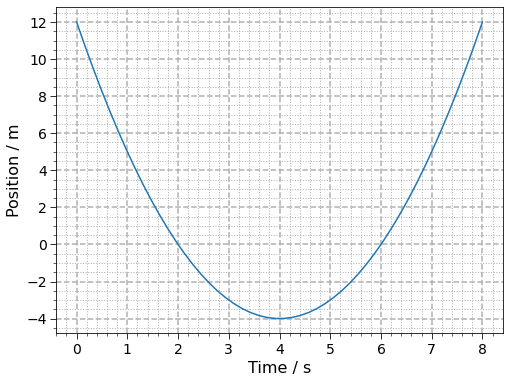

In [23]:
plot_muv(muv.tempo, muv.posicao)

Bem melhor, não acha?

Vamos personalizar com outras unidades, traduzindo o nome dos eixos e mudando o tamanho:

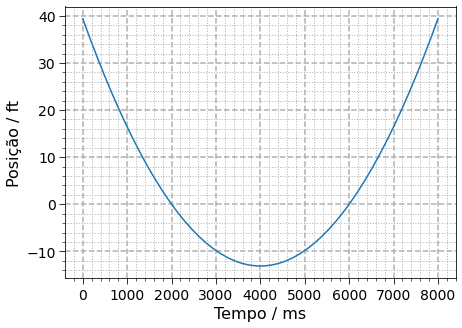

In [24]:
plot_muv(muv.tempo, muv.posicao, unidade_tempo='ms', unidade_posicao='ft', nome_eixo_x='Tempo', nome_eixo_y='Posição', tamanho=(7, 5))

Vamos agora verificar o poder de se trabalhar com eixos no `matplotlib`. Podemos criar um grid de plots, cada um com sistema de unidades. Usarei o método `subplots`, cuja documentação [está aqui](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html).

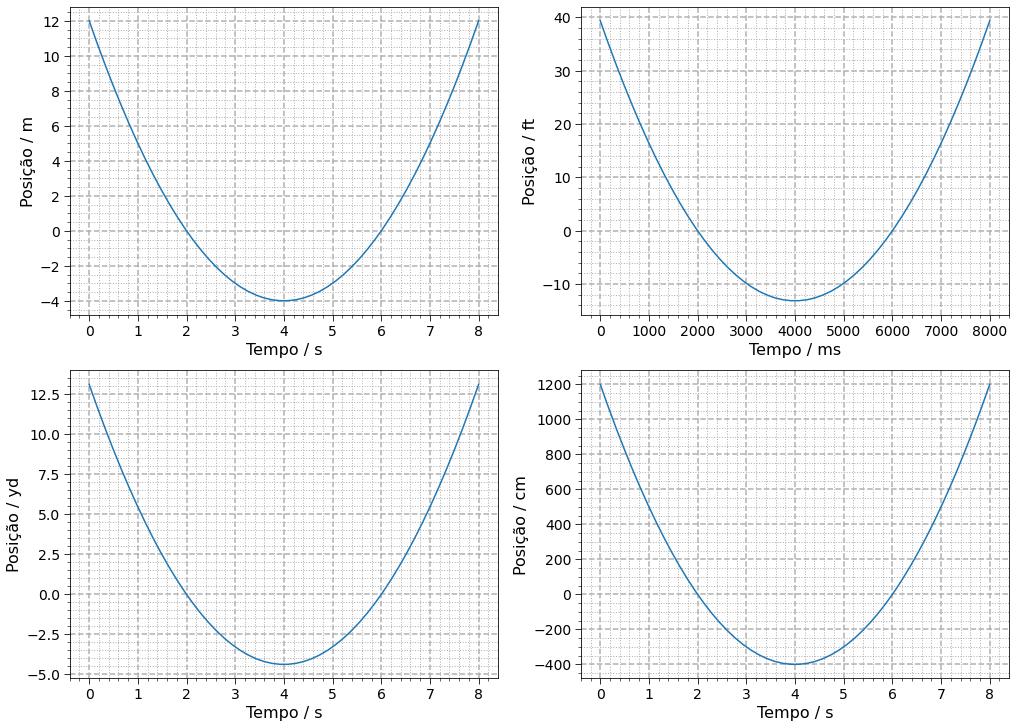

In [25]:
# criando um grid de gráficos com 2 colunas e 2 linhas
fig, arr = plt.subplots(nrows=2, ncols=2, figsize=(14,10), constrained_layout=True, facecolor=(1,1,1))

# arr é uma matriz de posições para os gráficos. Ver link da documentação acima

plot_muv(muv.tempo, muv.posicao, unidade_tempo='s', unidade_posicao='m', nome_eixo_x='Tempo', nome_eixo_y='Posição', ax=arr[0, 0])

plot_muv(muv.tempo, muv.posicao, unidade_tempo='ms', unidade_posicao='ft', nome_eixo_x='Tempo', nome_eixo_y='Posição', ax=arr[0, 1])

plot_muv(muv.tempo, muv.posicao, unidade_tempo='s', unidade_posicao='yards', nome_eixo_x='Tempo', nome_eixo_y='Posição', ax=arr[1, 0])

plot_muv(muv.tempo, muv.posicao, unidade_tempo='s', unidade_posicao='cm', nome_eixo_x='Tempo', nome_eixo_y='Posição', ax=arr[1, 1])

Repare no que acabamos de fazer. É o mesmo conjunto de dados, que foi passado uma única vez, e quatro gráficos foram gerados com algumas poucas linhas de código. As conversões se tornam muito simples com o `pint`.

Podemos elaborar ainda mais nossa função para mostrar os eixos em notação científica e modificar o nome do eixo para exibir a ordem de grandeza (a potência de 10 da notação).

In [26]:
def plot_muv(array_tempo, array_posicao, unidade_tempo='s', unidade_posicao='m', nome_eixo_y='Position', nome_eixo_x='Time', ax=None, tamanho=(8, 6)):
    '''
    Função para plotar o gráfico de um Movimento Uniformemente Variado
    
    Parâmetros:
    ----------
    array_tempo: array, array de valores relacionados a tempo com unidade associada
    array_posicao: array, array de valores relacionados a posição com unidade associada
    unidade_tempo: string, unidade para utilizar com os valores de tempo, padrão de segundos
    unidade_posicao: string, unidade para utilizar com os valores de posicao, padrão de metros
    nome_eixo_y: string, nome para o eixo vertical permitindo tradução para outros idiomas, padrão 'Position'
    nome_eixo_x: string, nome para o eixo horizontal permitindo tradução para outros idiomas, padrão 'Time'
    ax: Matplotlib axes, eixo onde o gráfico será plotado, padrão None
    tamanho: tuple, tamanho da figura que será criada caso nenhum eixo seja passado, padrão (8, 6)
    
    Retorno:
    --------
    Matplotlib axes, eixo para uma figura
    '''
    
    if ax is None:
        fig, ax = plt.subplots(figsize=tamanho, facecolor=(1.0, 1.0, 1.0))
    
    # chamando a função para os parâmetros personalizados
    _plot_params(ax)
    
    # plot, convertendo os dados para as unidades passadas
    ax.plot(array_tempo.to(unidade_tempo), array_posicao.to(unidade_posicao))
    
    # formata os eixos para o estilo de notação científica, usando potência de 10 ao invés de "E"
    ax.ticklabel_format(style='sci', axis='both', scilimits=(0, 0))
    ax.yaxis.major.formatter._useMathText = True
    ax.xaxis.major.formatter._useMathText = True    
    ax.figure.canvas.draw()  # precisa redesenhar para ter efeito
    
    # retira o sinal de multiplicação da potência de 10, armazenando em variáveis de ordem de grandeza
    order_magnitude_y = ax.yaxis.get_offset_text().get_text().replace('\\times', '')
    order_magnitude_x = ax.xaxis.get_offset_text().get_text().replace('\\times', '')
    
    # desativa a visualização padrão do matplotlib para podermos exibir a nossa personalizada
    ax.yaxis.offsetText.set_visible(False)
    ax.xaxis.offsetText.set_visible(False)
    
    # personalização dos nomes dos eixos com o padrão adotado pela comunidade científica (Nome do eixo / unidade)    
    ax.set_xlabel(nome_eixo_x + ' / ' + order_magnitude_x + f' {ureg(unidade_tempo).units:~P}')
    ax.set_ylabel(nome_eixo_y + ' / ' + order_magnitude_y + f' {ureg(unidade_posicao).units:~P}')

Vamos testar essa nova implementação:

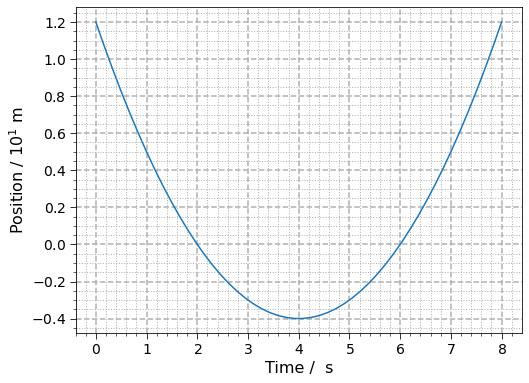

In [27]:
plot_muv(muv.tempo, muv.posicao)

Agora o eixo de posição está em notação científica, deixando isso claro na denominação do eixo. O eixo de tempo não necessita de potência de 10, então ela não é exibida. Vamos testar com outras unidades:

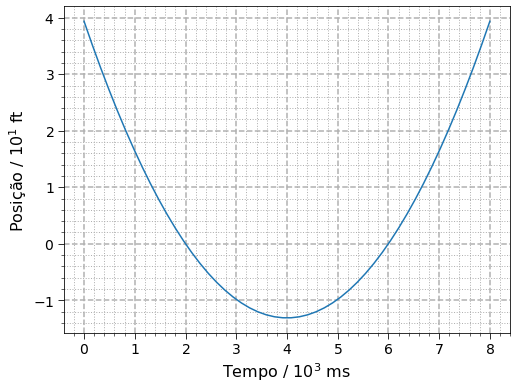

In [28]:
plot_muv(muv.tempo, muv.posicao, unidade_tempo='ms', unidade_posicao='ft', nome_eixo_x='Tempo', nome_eixo_y='Posição')

Repare que ambos os eixos estão em notação científica e exibindo essa informação na denominação dos eixos.

Criando novamente nosso grid de gráficos:

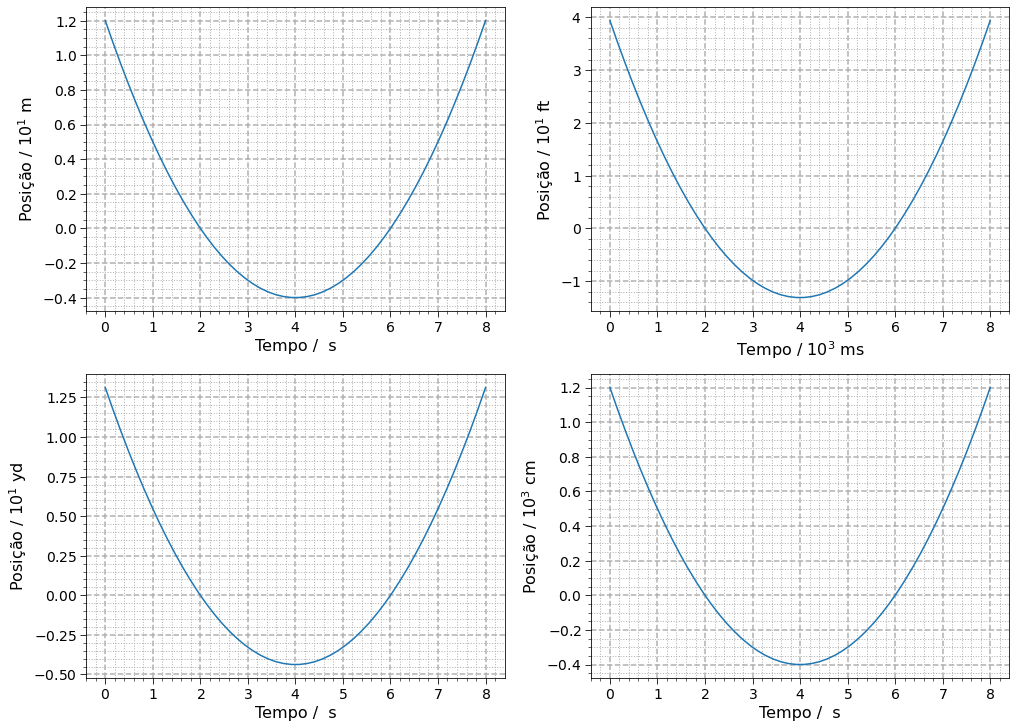

In [29]:
# criando um grid de gráficos com 2 colunas e 2 linhas
fig, arr = plt.subplots(nrows=2, ncols=2, figsize=(14,10), constrained_layout=True, facecolor=(1,1,1))

# arr é uma matriz de posições para os gráficos. Ver link da documentação acima

plot_muv(muv.tempo, muv.posicao, unidade_tempo='s', unidade_posicao='m', nome_eixo_x='Tempo', nome_eixo_y='Posição', ax=arr[0, 0])

plot_muv(muv.tempo, muv.posicao, unidade_tempo='ms', unidade_posicao='ft', nome_eixo_x='Tempo', nome_eixo_y='Posição', ax=arr[0, 1])

plot_muv(muv.tempo, muv.posicao, unidade_tempo='s', unidade_posicao='yards', nome_eixo_x='Tempo', nome_eixo_y='Posição', ax=arr[1, 0])

plot_muv(muv.tempo, muv.posicao, unidade_tempo='s', unidade_posicao='cm', nome_eixo_x='Tempo', nome_eixo_y='Posição', ax=arr[1, 1])

## Conclusão

A combinação de `pint`, `numpy` e `matplotlib` é sensacional. Com algumas poucas linhas de código podemos associar unidades a conjuntos de dados e criar diferentes gráficos para diferentes sistemas de unidade utilizando um mesmo conjunto de dados.

Não há mais desculpas para não utilizar essa combinação em código envolvendo quantidades físicas, correto? E ainda há mais por vir, esse trio de bibliotecas vai ser muito presente aqui nos artigos.

Caso queira saber mais, deixe seu comentário. Compartilhe esse artigo e acompanhe o Ciência Programada nas nas redes sociais linkadas no cabeçalho e no rodapé da página para saber quando novos artigos forem publicados.

Até a próxima!